# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Next we will import each of the three tables and assign names to each of the columns:

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python', encoding="latin-1")


# Assignment 1

In [3]:
# import the necessary pacakges
import pandas as pd
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


## Question 1:

#### [10 pts] An aggregate of movie ratings by men of age above 25 for each particular genre, e.g., Action, Adventure, Drama, Science Fiction, ... Note, Action|Drama|Thriller’ is not considered a unique genre. The movie that has a genre like this belongs to all three genres.

In [115]:
# create a copy of the original dataframe
ret = data.copy()

# filter the given data for 'gender = M' and 'age > 25'
ret = ret[(ret["gender"] == "M") & (ret["age"] > 25)]

# explode the multiple genre fields
ret["genres"] = ret["genres"].str.split("|")
new_ret = ret.explode("genres").reset_index().drop("index",1)

# find the aggregate (mean)
new_ret.groupby("genres")["rating"].mean().reset_index()



,genres,rating
0,Action,3.554547
1,Adventure,3.538637
2,Animation,3.721569
3,Children's,3.475314
4,Comedy,3.565456
5,Crime,3.764249
6,Documentary,3.950192
7,Drama,3.812309
8,Fantasy,3.490408
9,Film-Noir,4.117140


## Question 2:

#### [5 pts] The top 5 ranked movies by the most number of ratings (not the highest rating).

In [111]:
# top 5 overall ranked movies by most number of ratings
ret = data.groupby(["title"], as_index=False)["rating"].count()
ret = ret.rename(columns={"rating" : "number of rating"}).sort_values("number of rating", ascending=False)[:5]
ret

,title,number of rating
127,American Beauty (1999),3428
3153,Star Wars: Episode IV - A New Hope (1977),2991
3154,Star Wars: Episode V - The Empire Strikes Back...,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883
1789,Jurassic Park (1993),2672


## Question 3

#### [20 pts] Average movie ratings between users of different age groups (<18, 18-30, 30-50, 50-70, 70>)

In [6]:
ret = data.copy()

ret["bucket"] = None

# bucket <18
ret.loc[ret["age"] < 18, "bucket"] = "<18"

# bucket 18-30
ret.loc[(ret["age"] >= 18) & (ret["age"] < 30), "bucket"] = "18-30"

# bucket 30-50
ret.loc[(ret["age"] >= 30) & (ret["age"] < 50), "bucket"] = "30-50"

# bucket 50-70
ret.loc[(ret["age"] >= 50) & (ret["age"] < 70), "bucket"] = "50-70"

# bucket 70>
ret.loc[ret["age"] >= 70, "bucket"] = ">70"

ret.groupby("bucket", as_index=False)["rating"].mean()



,bucket,rating
0,18-30,3.533299
1,30-50,3.624050
2,50-70,3.732677
3,<18,3.549520


## Question 4

#### [25 pts] Pick a movie of your choice and for all movies of the same year, provide a breakdown of the number of unique movies rated by 3 ranges of age of reviewers (a) under 18 (b) 19 to 45 (c) Above 45.

In [45]:
import random

ret = data.copy()

# choose a movie at random
indx = random.randint(0, len(data))
movie_name = ret.loc[indx, "title"]
print("Movie Name : ", movie_name)

# get the year for the movie
movie_year = movie_name.split("(")[-1].split(")")[0]
print("Movie Year : ", movie_year)

movie_year = "1993"
# get the list of movies of the same year
list_of_movies_indx = ret[ret["title"].str.contains(movie_year)].index
list_of_movies = ret.loc[list_of_movies_indx, "title"].unique()

print("Total number of movies with same year : ", len(list_of_movies))
print("\nSample movies : ")
print(list_of_movies[:10])

# bucket the movies into 3 categories
ret["bucket"] = None

# bucket <18
ret.loc[ret["age"] <= 18, "bucket"] = "<18"

# bucket 19-45
ret.loc[(ret["age"] > 18) & (ret["age"] <= 45), "bucket"] = "19-45"

# bucket >45
ret.loc[ret["age"] > 45, "bucket"] = ">45"

# filter the movies of the same year
ret = ret[ret["title"].str.contains(movie_year)]

# group by the buckets
ret.groupby("bucket", as_index=False)["title"].nunique()





Movie Name :  Lost in Space (1998)
Movie Year :  1998
Total number of movies with same year :  160

Sample movies : 
["Schindler's List (1993)" 'Secret Garden, The (1993)'
 'Cliffhanger (1993)' 'Remains of the Day, The (1993)'
 'Demolition Man (1993)' 'Jurassic Park (1993)' 'Groundhog Day (1993)'
 'Fugitive, The (1993)' 'Mr. Jones (1993)' 'Three Musketeers, The (1993)']


,bucket,title
0,19-45,157
1,<18,150
2,>45,151


## Question 5

#### [20 pts] A function that takes in a user_id and a movie_id, and returns a list of all the other movies that the user rated similarly to the given movie, i.e. with the same rating. Demonstrate that your function works.

In [113]:
ret = data.copy()

def get_random_pair():
    
    # get a index at random from the dataframe
    indx = random.randint(0, len(ret))
    return ret.loc[indx, "user_id"], ret.loc[indx, "movie_id"]

def get_similar_movies(user_id, movie_id):

    # get the rating 
    rating = ret[(ret["user_id"] == user_id) & (ret["movie_id"] == movie_id)]["rating"].tolist()

    # check if such pair exists
    if len(rating) == 0:
        print("[INFO] : No (user_id, movie_id) pair found\n\n")

    # if multiple values found take the first value
    rating = rating[0]

    # filter the movies where the user has given the same rating
    similar_movies = ret[(ret["user_id"] == user_id) & (ret["rating"] == rating)][["title"]].reset_index().drop("index",1)

    return similar_movies

user_id, movie_id = get_random_pair()
print("Randomly chosen (user_id, movie_id) pair : ", (user_id, movie_id))

similar_movies = get_similar_movies(user_id, movie_id)
print("Total number of movies with similar rating : ", len(similar_movies))
print("\n\nSample Movies : \n")
similar_movies


Randomly chosen (user_id, movie_id) pair :  (1078, 613)
Total number of movies with similar rating :  54


Sample Movies : 



,title
0,One Flew Over the Cuckoo's Nest (1975)
1,Star Wars: Episode VI - Return of the Jedi (1983)
2,Breakfast at Tiffany's (1961)
3,Star Wars: Episode V - The Empire Strikes Back...
4,Forrest Gump (1994)
5,Gods and Monsters (1998)
6,Pulp Fiction (1994)
7,Edward Scissorhands (1990)
8,"Age of Innocence, The (1993)"
9,Big Night (1996)


## Question 6

#### [20 pts] Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

#### 1) Relation between the number of reviews and the movie release year. 
##### Hypothesis:
> My hypothesis is the number of reviews should be skewed towards the latest movies.

##### Reason:
> The reason behind my hypothesis is that, as the platform becomes more popular towards time, the users will be shown new movies. Hence, more ratings for latest movies. And also young users are familiar with technology and they are biased towards latest movies

##### Findings:
> The below graph shows that there is a skew towards the recent years. 
\
> This indicates that, from the given distribution of data. The users are more proactive towards the recent movies compared to the old movies

This confirms the hypothesis


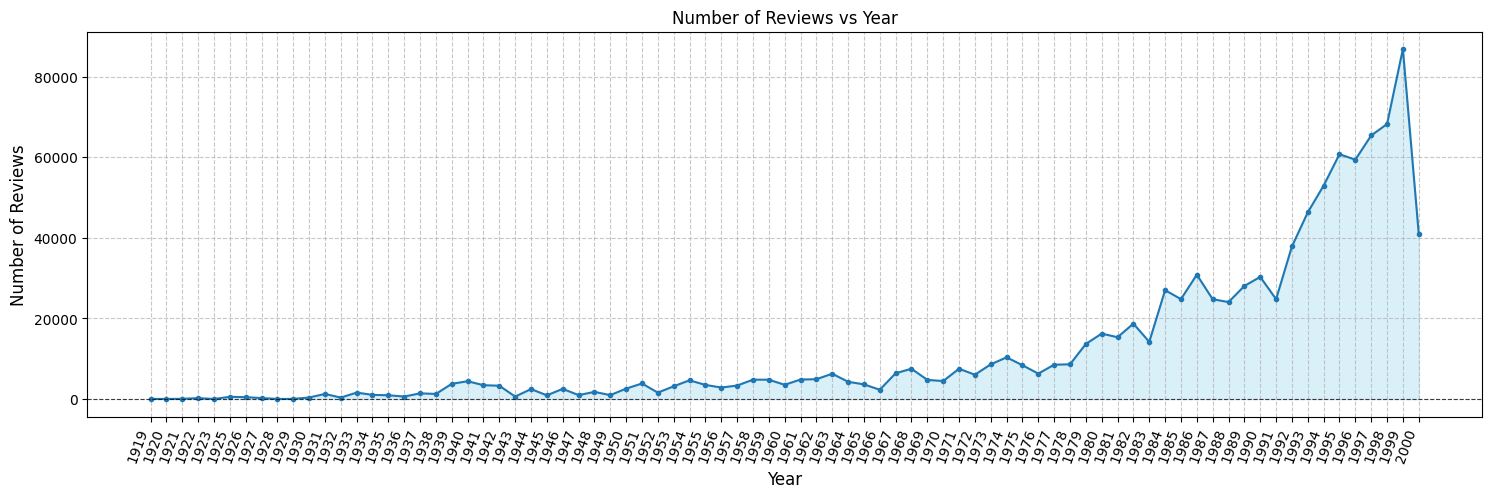

In [114]:
import matplotlib.pyplot as plt
import math as m
import seaborn as sns

ret = data.copy()
ret["year"] = ret["title"].apply(lambda x : x.split("(")[-1].split(")")[0])
year_movie = ret.groupby("year")["movie_id"].count().to_dict()

plt.figure(figsize=(18,5))
plt.plot(year_movie.keys(), year_movie.values(), marker=".")
plt.fill_between(list(year_movie.keys()), list(year_movie.values()), color='skyblue', alpha=0.3)  # Shading region below the line

plt.title("Number of Reviews vs Year", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=70, ha="right")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--", alpha=0.7)
plt.grid(linestyle="--", alpha=0.7)

plt.show()

#### 2) Distribution of number of reviews vs age of the users

##### Hypothesis:
> Young users should be more compared to old users

##### Reason:
> Young users are more familiar with internet

##### Findings:
> Most of the reviews are contributed by the people belonging to the age group 18-30

This confirms the hypothesis 

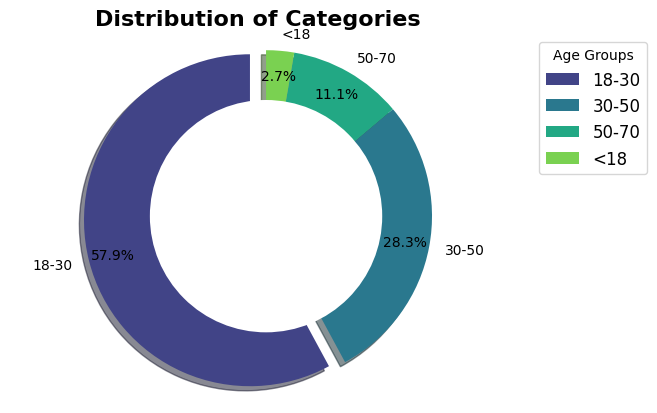

In [10]:
ret = data.copy()

ret["bucket"] = None

def get_buckets():
        # bucket <18
        ret.loc[ret["age"] < 18, "bucket"] = "<18"

        # bucket 18-30
        ret.loc[(ret["age"] >= 18) & (ret["age"] < 30), "bucket"] = "18-30"

        # bucket 30-50
        ret.loc[(ret["age"] >= 30) & (ret["age"] < 50), "bucket"] = "30-50"

        # bucket 50-70
        ret.loc[(ret["age"] >= 50) & (ret["age"] < 70), "bucket"] = "50-70"

        # bucket 70>
        ret.loc[ret["age"] >= 70, "bucket"] = ">70"

        age_count = ret.groupby("bucket", as_index=True)["rating"].count().to_dict()

        return age_count

age_count = get_buckets()

colors = sns.color_palette('viridis', n_colors=len(age_count))
explode = (0.1, 0, 0, 0)

fig, ax = plt.subplots()
ax.pie(age_count.values(), labels=age_count.keys(), autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, pctdistance=0.85, labeldistance=1.1)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title("Distribution of Categories", fontsize=16, fontweight='bold')
plt.legend(title="Age Groups", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=12)  # Descriptive legend
plt.show()

#### 3) Distribution of Male vs Female users

##### Hypothesis:
> Male and Female distrubition should be equal

##### Reason:
> I don't forsee any bias towards my hypothesis

##### Findings:
> Around 70% of the users are Male. 

My hypothesis was wrong, further investigation required

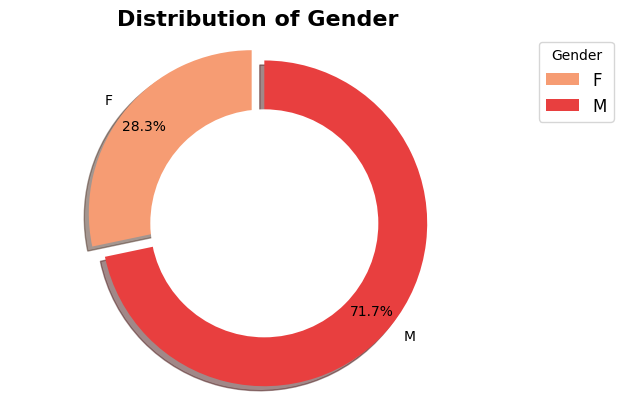

In [11]:
ret = data.copy()

gender_count = ret.groupby("gender", as_index=True)["user_id"].nunique().to_dict()

colors = sns.color_palette('rocket_r', n_colors=len(age_count))
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(gender_count.values(), labels=gender_count.keys(), autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, pctdistance=0.85, labeldistance=1.1)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title("Distribution of Gender", fontsize=16, fontweight='bold')
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=12)  # Descriptive legend
plt.show()

#### 4) Distribution of Rating vs Genres divided by male and female

##### Hypothesis:
> Horror film should have more diverged ratings.
\
> Documentries should have more good ratings

##### Reason:
> Horror films are subjective, some people rate it good based on how scary it is and other people rate it bad for the same reason
\
> Documentries are often skewed, at large the users interested in these documentries would be familiar with the subject of the documentry. Hence they have less negative ratings

##### Findings:

> The horror genre has relatively large number of "1" and "2" ratings
\
> People usually give better ratings for documentries
\
> Most of the genre has rating of "4"
\
> Male and Female follow almost equal distribution when it comes to ratings
\
> Drama has less negative ratings

My hypothesis is right, along with this we can observe interesting patterns from the below graph

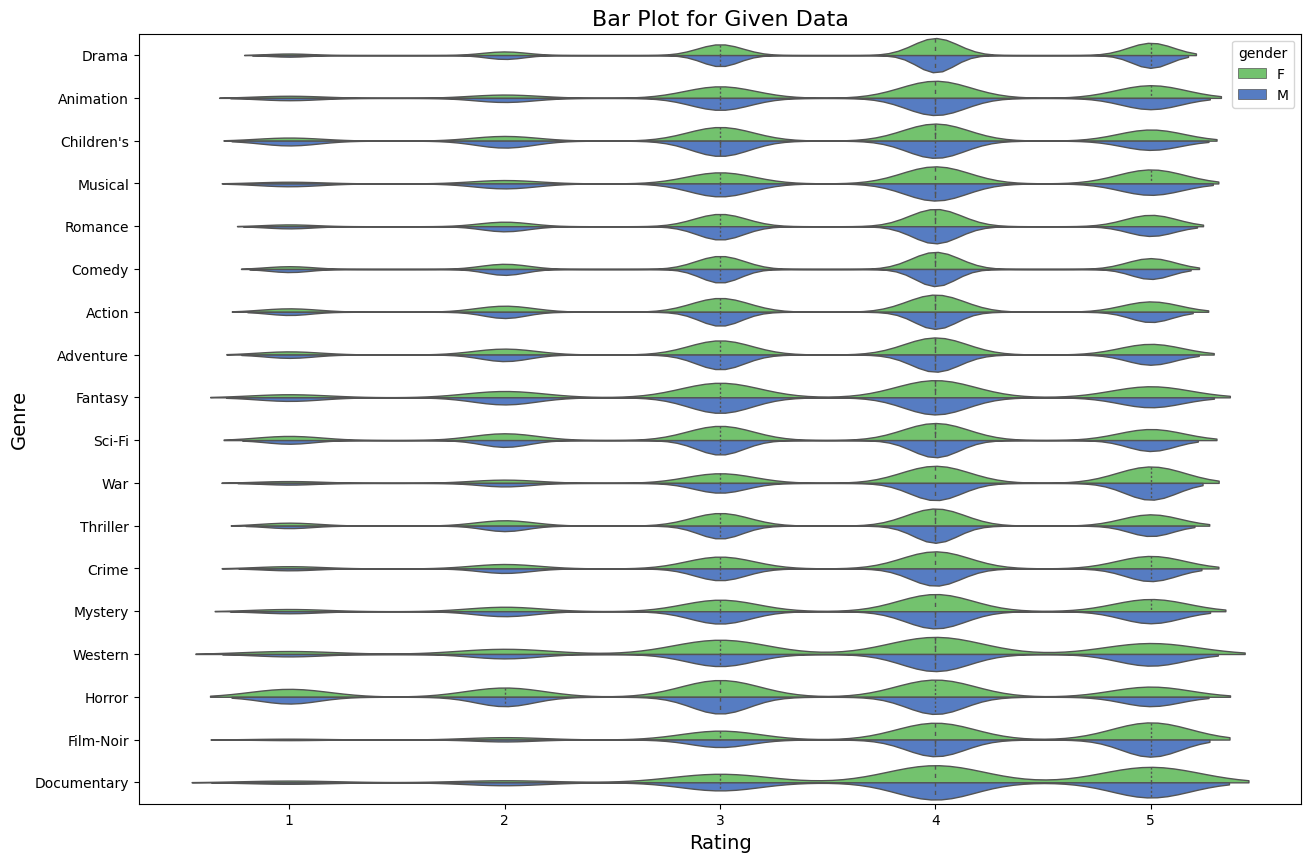

In [12]:
ret = data.copy()

# explode the multiple genre fields
ret["genres"] = ret["genres"].str.split("|")
new_ret = ret.explode("genres").reset_index().drop("index",1)

# find the aggregate (mean)
new_ret.groupby("genres")["rating"].mean().reset_index()
new_ret.dropna()

# Violin plot using Seaborn
palette = sns.color_palette("muted")

plt.figure(figsize=(15, 10))
sns.violinplot(
    x="rating", y="genres", data=new_ret,
    hue="gender", split=True, inner="quart", linewidth=1,
    palette={"M": palette[0], "F": palette[2]},
    scale="width", width=0.8, saturation=0.8
)
plt.title("Bar Plot for Given Data", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Genre", fontsize=14)

plt.show()

#### 5) Movies with scattered ratings

> The below list of movies are some examples of diverging reviews. Where the number of ratings is not skewed. For example, 100 people might have rated a film 5 and 100 people might have rated a film 1


In [93]:
import statistics as stat

ret = data.copy()

rat_count = ret.groupby(["title"], as_index=True)["rating"].value_counts().to_dict()
rat_count

rat_count_map = {}
for k, v in rat_count.items():
    if k[0] not in rat_count_map:
        rat_count_map[k[0]] = [0, 0, 0, 0, 0]
    rat_count_map[k[0]][k[1]-1] = v

std_map = {}

for k, v in rat_count_map.items():
    std_map[k] = stat.stdev(v)

std_map = dict(sorted(std_map.items(), key=lambda x : x[1], reverse=True))
top_5_movies = list(std_map.keys())[:5]

print("Top 5 movies with highest divergence : ", top_5_movies)

for m in top_5_movies:
    print("Movie : ", m)
    print("Ratings : ", rat_count_map[m])
    print()

Top 5 movies with highest divergence :  ['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Raiders of the Lost Ark (1981)', "Schindler's List (1993)"]
Movie :  American Beauty (1999)
Ratings :  [83, 134, 358, 890, 1963]

Movie :  Star Wars: Episode IV - A New Hope (1977)
Ratings :  [19, 62, 288, 796, 1826]

Movie :  Star Wars: Episode V - The Empire Strikes Back (1980)
Ratings :  [22, 83, 375, 1027, 1483]

Movie :  Raiders of the Lost Ark (1981)
Ratings :  [4, 37, 213, 760, 1500]

Movie :  Schindler's List (1993)
Ratings :  [19, 28, 186, 596, 1475]

